# Kmeans clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [2]:
wh = pd.read_csv('2017.csv')

In [3]:
wh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

<AxesSubplot:>

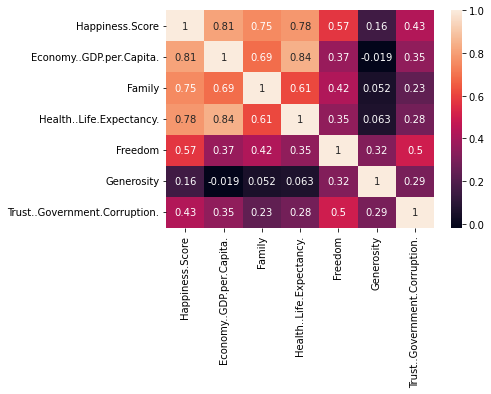

In [4]:
wh1 = wh.iloc[:,[2,5,6,7,8,9,10]]
cor = wh1.corr()

sns.heatmap(cor, annot = True)

In [5]:
ss = StandardScaler()
X = wh.iloc[:,[5,10]].values # Economy GDP vs Trust Gov Corruption : choose column for doing elbow method
X_scaled = ss.fit_transform(X)
X_scaled

array([[ 1.50618765,  1.90308437],
       [ 1.18651768,  2.73999784],
       [ 1.1823454 ,  0.30006609],
       [ 1.38344191,  2.40680857],
       [ 1.09398544,  2.56079976],
       [ 1.23792427,  1.57444226],
       [ 1.17893937,  1.62092002],
       [ 1.00370674,  2.56282438],
       [ 1.21513788,  2.57843667],
       [ 1.19136213,  1.75722637],
       [ 0.93141005, -0.37380164],
       [ 0.29799288, -0.22711087],
       [ 1.19775726,  0.96652596],
       [ 1.3388096 ,  0.12353995],
       [ 1.31365029,  1.72963811],
       [ 1.19972687,  1.51592295],
       [ 1.14216675,  1.26537256],
       [ 1.80535433,  1.93141289],
       [ 1.08936495,  1.40437027],
       [ 0.63911598, -0.40295446],
       [ 1.5297437 ,  1.98722085],
       [ 0.29238275, -0.11869343],
       [ 0.87728922, -0.85113462],
       [ 0.47821036, -0.62547117],
       [ 0.40165073,  0.09526981],
       [ 1.6869423 ,  3.36702216],
       [ 0.85487202,  0.29552172],
       [ 0.55513378,  0.54219374],
       [-0.26873475,

C:\Users\asusZ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


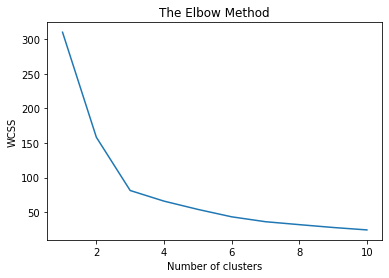

In [6]:
# Finding the number of clusters using the Elbow Method:
from sklearn.cluster import KMeans
wcss = [] # wcss start with empty list
for i in range(1,11): # i:cluster no(1-10)
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42) # 'k-means++:increase speed
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_:wcss value pada i
plt.plot(range(1,11),wcss) # x:range(1,11), y:wcss
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# result: choose elbow n_clusters,k=3 untuk next step

In [7]:
# K-Means Clustering:
kmeans=KMeans(n_clusters=3,init='k-means++', random_state=42) # n_clusters=3:elbow value
y_kmeans=kmeans.fit_predict(X_scaled)
y_kmeans

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2])

C:\Users\asusZ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


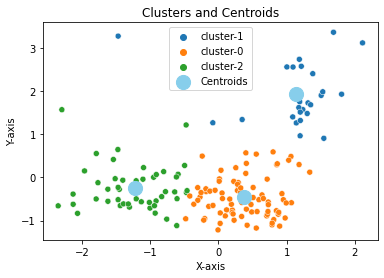

In [15]:
# Visualizing K-Means Clustering:
# x= X_scaled[:,0], y=X_scaled[:,1], hue=color:'cluster-{x}' will go to legend, x=y_means variable value
# Kita tetapkan nama string 'cluster-{}' untuk legend
# c='skyblue' /'black', 'orange', 'red' nama2 warna
# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap="plasma")
sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=['cluster-{}'.format(x) for x in y_kmeans]) # utk data point
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='skyblue', label='Centroids') #utk centroid
plt.title('Clusters and Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [9]:
score = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
print(score)
# ADS Day 3 pg25
# silhouette_score = 1 : cluster is dense and well separated 
# silhouette_score = 0 : overlapping clusters
# silhouette_score = -1 : samples might have been assigned wrongly

0.49765562338026476


C:\Users\asusZ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


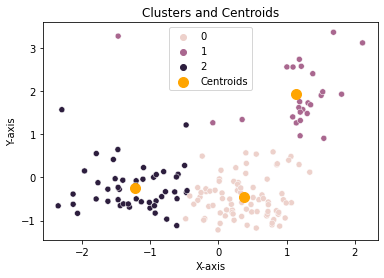

In [10]:
# Visualizing K-Means Clustering:
# x= X_scaled[:,0], y=X_scaled[:,1], hue=color:'cluster-{x}' will go to legend, x=y_means variable value
sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='orange', label='Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

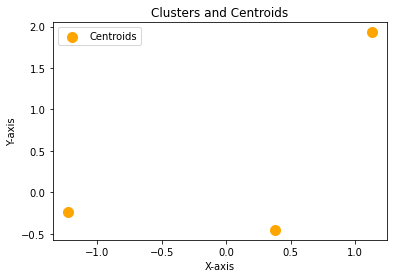

In [11]:
# Visualizing K-Means Clustering:
# x= X_scaled[:,0], y=X_scaled[:,1], hue=color:'cluster-{x}' will go to legend, x=y_means variable value
#sns.scatterplot(X_scaled[:,0], X_scaled[:,1], hue=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='orange', label='Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [12]:
x='sayaaa'
print('cluster-{}'.format(x))

cluster-sayaaa
